In [234]:
import numpy as np
from astropy.io import fits
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from astroML.stats import binned_statistic_2d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [235]:
fitsfiles = ["HLC.RA_00_to_01.fits.gz","HLC.RA_01_to_02.fits.gz","HLC.RA_02_to_03.fits.gz","HLC.RA_03_to_04.fits.gz",
            "HLC.RA_20_to_21.fits.gz","HLC.RA_21_to_22.fits.gz","HLC.RA_22_to_23.fits.gz",
            "HLC.RA_23_to_24.fits.gz"]

In [236]:
for file in fitsfiles:
    label = file.split('.')[1].split('_')[1]
    openfits = fits.open(file)
    hdr = openfits[1].header
    data = openfits[1].data
    dat = np.array(data).byteswap().newbyteorder()
    
    dict_dat = {'MEAN_OBJECT_TYPE':dat['MEAN_OBJECT_TYPE'],'u':dat['MEAN_PSFMAG'][:,0],
        'g':dat['MEAN_PSFMAG'][:,1],'r':dat['MEAN_PSFMAG'][:,2],'i':dat['MEAN_PSFMAG'][:,3],
        'RA_PM':dat['RA_PM'],'DEC_PM':dat['DEC_PM']}
    
    #read as dataframe
    df = pd.DataFrame(data=dict_dat)
    
    #separate stars and galaxies
    star = df[df['MEAN_OBJECT_TYPE'] > 5]
    gal = df[df['MEAN_OBJECT_TYPE'] <= 5]
    
    
    #Plot the bivariate distribution of r vs g-i for stars for every 50 points
    ax = sns.jointplot(x=tuple(star['r'][::50]),y=tuple(star['g'][::50]-star['i'][::50]),kind='kde')
    ax.set_axis_labels('r', 'g-i', fontsize=16)
    ax.ax_marg_x.set_xlim(11,25)
    ax.ax_marg_y.set_ylim(-2,5)
    ax.fig.suptitle('Star_'+label+'.png')
    plt.tight_layout()
    plt.savefig('stardensity_'+label+'.png')
    plt.close()
    
    #Plot the bivariate distribution of r vs g-i for galaxies for every 50 points
    ax = sns.jointplot(x=tuple(gal['r'][::50]),y=tuple(gal['g'][::50]-gal['i'][::50]),kind='kde')
    ax.set_axis_labels('r', 'g-i', fontsize=16)
    ax.ax_marg_x.set_xlim(15,25)
    ax.ax_marg_y.set_ylim(-2,5)
    ax.fig.suptitle('Galaxy_'+label+'.png')
    plt.tight_layout()
    plt.savefig('galdensity_'+label+'.png')
    plt.close()
    
    #Color by R_PA and DEC_PA star
    f, (ax2, ax3) =  plt.subplots(1,2,figsize=(18, 6))
    points = ax2.scatter(star['r'][::50],star['g'][::50]-star['i'][::50],c=star['RA_PM'][::50],s=4,cmap="Spectral",
                    vmin=-0.015, vmax=0.015)
    plt.colorbar(points,ax=ax2)
    sns.kdeplot(star['r'][::50],star['g'][::50]-star['i'][::50],ax=ax2)
    points3 = ax3.scatter(star['r'][::50],star['g'][::50]-star['i'][::50],c=star['DEC_PM'][::50],s=4, cmap="Spectral",
                          vmin=-0.015, vmax=0.015)
    plt.colorbar(points3,ax=ax3)
    sns.kdeplot(star['r'][::50],star['g'][::50]-star['i'][::50],ax=ax3)
    ax2.set_xlim(11,25)
    ax2.set_ylim(-2,5)
    ax2.set_xlabel('r',fontsize=16)
    ax2.set_ylabel('g-i',fontsize=16)
    ax2.set_title('Stars colored by RA_PM',fontsize=16)
    ax3.set_xlabel('r',fontsize=16)
    ax3.set_ylabel('g-i',fontsize=16)
    ax3.set_title('Stars colored by DEC_PM',fontsize=16)
    ax3.set_xlim(11,25)
    ax3.set_ylim(-2,5)
    plt.savefig('Star_RADEC_PA'+label+'.png')
    plt.close()
    
    #Color by R_PA and DEC_PA galaxy
    f, (ax2, ax3) =  plt.subplots(1,2,figsize=(18, 6))
    points = ax2.scatter(gal['r'][::50],gal['g'][::50]-gal['i'][::50],c=gal['RA_PM'][::50],s=4,cmap="Spectral",
                    vmin=-0.015, vmax=0.015)
    #points = ax2.scatter(gal['r'][::50],gal['g'][::50]-gal['i'][::50],c=gal['RA_PM'][::50],s=4,cmap="Spectral",
    #                vmin=np.min(gal['RA_PM'][::50]), vmax=np.max(gal['RA_PM'][::50]))
    plt.colorbar(points,ax=ax2)
    #sns.scatterplot(x=tuple(gal['r'][::50]),y=tuple(gal['g'][::50]-gal['i'][::50]),
    #                hue=tuple(gal['RA_PM'][::50]),alpha=0.4,ax=ax2)
    sns.kdeplot(gal['r'][::50],gal['g'][::50]-gal['i'][::50],ax=ax2)
    #sns.scatterplot(x=tuple(gal['r'][::50]),y=tuple(gal['g'][::50]-gal['i'][::50]),
    #                hue=tuple(gal['DEC_PM'][::50]),alpha=0.4,ax=ax3)
    points3 = ax3.scatter(gal['r'][::50],gal['g'][::50]-gal['i'][::50],c=gal['DEC_PM'][::50],s=4, cmap="Spectral",
                          vmin=-0.015, vmax=0.015)
    #points3 = ax3.scatter(gal['r'][::50],gal['g'][::50]-gal['i'][::50],c=gal['DEC_PM'][::50],s=4, cmap="Spectral",
    #                      vmin=np.min(gal['DEC_PM'][::50]), vmax=np.max(gal['DEC_PM'][::50]))
    plt.colorbar(points3,ax=ax3)
    sns.kdeplot(gal['r'][::50],gal['g'][::50]-gal['i'][::50],ax=ax3)
    ax2.set_xlim(15,25)
    ax2.set_ylim(-2,5)
    ax2.set_xlabel('r',fontsize=16)
    ax2.set_ylabel('g-i',fontsize=16)
    ax2.set_title('Galaxies colored by RA_PM',fontsize=16)
    ax3.set_xlabel('r',fontsize=16)
    ax3.set_ylabel('g-i',fontsize=16)
    ax3.set_title('Galaxies colored by DEC_PM',fontsize=16)
    ax3.set_xlim(15,25)
    ax3.set_ylim(-2,5)
    plt.savefig('Galaxy_RADEC_PA'+label+'.png')
    plt.close()
    
    
    

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

In [37]:
import scipy.stats as st
import statsmodels.api as sm
from astropy.visualization import hist as ahist


In [6]:
pathfile = '/Users/sreevani/Research/Datascience/ASTR596/data/01/'

dat = pd.read_csv(pathfile+'IntroStat_demo.csv')

In [110]:
#Mean, Variance and standard deviation
outlier_mean = np.mean(dat["mag.outlier"])
outlier_var = np.var(dat["mag.outlier"])
outlier_std = np.std(dat["mag.outlier"])

print(outlier_mean,outlier_var,outlier_std)

18.561082466856572 0.005081094393001044 0.07128179566341636


In [125]:
X = dat["mag.outlier"]


In [94]:
#Explore the distribution of the sample
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 4))
ahist(X, bins='freedman', density=True,ax=ax1)
xval = np.linspace(np.min(X),np.max(X),len(X))
estpdf  = st.norm.pdf(xval, loc=outlier_mean, scale=outlier_std)
estcdf  = st.norm.cdf(xval, loc=outlier_mean, scale=outlier_std)
estppf = st.norm.ppf(np.arange(0,1,0.01),loc=outlier_mean, scale=outlier_std)
ax1.plot(xval, estpdf, color='C1', lw=2)
ax1.set_xlabel('mag.outlier')
ax1.set_ylabel('PDF')
ax2.plot(xval, estcdf, color='C1', lw=2)
ax2.set_xlabel('mag.outlier')
ax2.set_ylabel('CDF')
ax3.plot(np.arange(0,1,0.01), estppf, color='C1', lw=2)
ax3.set_xlabel('Percentile')
ax3.set_ylabel('Inverse CDF')
plt.savefig('Explore_magoutlier.png')
plt.close()

In [240]:
#Quantile range
qqX = np.linspace(-2.5,2.5,len(X))
Y = outlier_mean + (outlier_std*qqX)

In [100]:
#Calculate the percentiles and the quantile values
percentile25 = st.norm.ppf(0.25,loc=outlier_mean, scale=outlier_std)
percentile75 = st.norm.ppf(0.75,loc=outlier_mean, scale=outlier_std)
Quantile25 = (percentile25-outlier_mean)/outlier_std
Quantile75 = (percentile75-outlier_mean)/outlier_std

In [246]:
print(percentile25,percentile75)
print(Quantile25,Quantile75)

18.513003626306027 18.609161307407117
-0.67448975019607 0.67448975019607


In [86]:
#Make line from two coordiantes
from numpy.linalg import lstsq
points = [(Quantile25,percentile25),(Quantile75,percentile75)]
x_coords, y_coords = zip(*points)
A = np.vstack([x_coords,np.ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

Line Solution is y = 0.07128179566341342x + 18.561082466856575


/Users/sreevani/anaconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [87]:
#New line from quantile, percentile values
Ynew = m*qqX+c

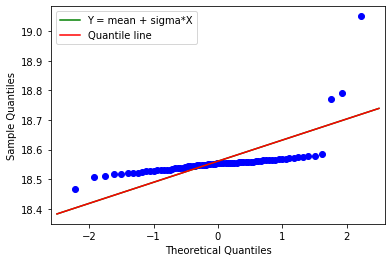

In [253]:
#Final plot
sm.qqplot(X)
plt.plot(qqX,Y,color='g',label='Y = mean + sigma*X')
plt.plot(qqX,Ynew,color='r',label = 'Quantile line')
plt.legend()
plt.savefig('Quantiles_magoutlier.png')
plt.show()

In [89]:
#Repeate the same as above with mag.het
X2 = dat["mag.het"]
het_mean = np.mean(X2)
het_var = np.var(X2)
het_std = np.std(X2)


In [239]:
print(het_mean,het_var)

18.54834115592681 0.002051771742037422


In [98]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 4))
ahist(X2, bins='freedman', density=True,ax=ax1)
xval2 = np.linspace(np.min(X2),np.max(X2),len(X2))
estpdf2  = st.norm.pdf(xval2, loc=het_mean, scale=het_std)
estcdf2  = st.norm.cdf(xval2, loc=het_mean, scale=het_std)
estppf2 = st.norm.ppf(np.arange(0,1,0.01),loc=het_mean, scale=het_std)
ax1.plot(xval2, estpdf2, color='C1', lw=2)
ax1.set_xlabel('mag.het')
ax1.set_ylabel('PDF')
ax2.plot(xval2, estcdf2, color='C1', lw=2)
ax2.set_xlabel('mag.het')
ax2.set_ylabel('CDF')
ax3.plot(np.arange(0,1,0.01), estppf2, color='C1', lw=2)
ax3.set_xlabel('Percentile')
ax3.set_ylabel('Inverse CDF')
plt.savefig('Explore_maghet.png')
plt.close()

In [244]:
qqX2 = np.linspace(-2.5,2.5,len(X2))
Y2 = het_mean + het_std*qqX2

In [101]:
percentile252 = st.norm.ppf(0.25,loc=het_mean, scale=het_std)
percentile752 = st.norm.ppf(0.75,loc=het_mean, scale=het_std)
Quantile252 = (percentile252-het_mean)/het_std
Quantile752 = (percentile752-het_mean)/het_std

In [238]:
print(percentile252,percentile752)

18.51778913966961 18.57889317218401


In [102]:
points2 = [(Quantile252,percentile252),(Quantile752,percentile752)]
x_coords2, y_coords2 = zip(*points2)
A2 = np.vstack([x_coords2,np.ones(len(x_coords2))]).T
m2, c2 = lstsq(A2, y_coords2)[0]
print("Line Solution is y = {m}x + {c}".format(m=m2,c=c2))

Line Solution is y = 0.045296487082745744x + 18.54834115592681


/Users/sreevani/anaconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [103]:
Ynew2 = m2*qqX2+c2

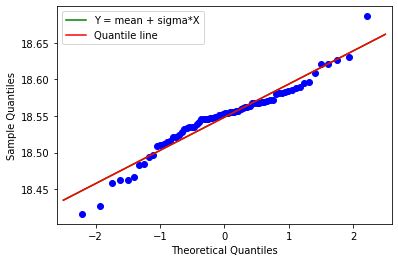

In [245]:
sm.qqplot(X2)
plt.plot(qqX2,Y2,color='g',label='Y = mean + sigma*X')
plt.plot(qqX2,Ynew2,color='r',label = 'Quantile line')
plt.legend()
plt.savefig('Quantiles_maghet.png')
plt.show()

In [115]:
#Repeate the same but now normalize mag.het
X3 = (X2 - het_mean)/dat["mag.het.error"]
normhet_mean = np.mean(X3)
normhet_var = np.var(X3)
normhet_std = np.std(X3)


In [249]:
print(normhet_mean,normhet_var)

0.11479798948895799 0.8235457747487397


In [117]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 4))
ahist(X3, bins='freedman', density=True,ax=ax1)
xval3 = np.linspace(np.min(X3),np.max(X3),len(X3))
estpdf3  = st.norm.pdf(xval3, loc=normhet_mean, scale=normhet_std)
estcdf3  = st.norm.cdf(xval3, loc=normhet_mean, scale=normhet_std)
estppf3 = st.norm.ppf(np.arange(0,1,0.01),loc=normhet_mean, scale=normhet_std)
ax1.plot(xval3, estpdf3, color='C1', lw=2)
ax1.set_xlabel('normalized mag.het')
ax1.set_ylabel('PDF')
ax2.plot(xval3, estcdf3, color='C1', lw=2)
ax2.set_xlabel('normalized mag.het')
ax2.set_ylabel('CDF')
ax3.plot(np.arange(0,1,0.01), estppf3, color='C1', lw=2)
ax3.set_xlabel('Percentile')
ax3.set_ylabel('Inverse CDF')
plt.savefig('Explore_normalized_maghet.png')
plt.close()

In [247]:
qqX3 = np.linspace(-2.5,2.5,len(X3))
Y3 = normhet_mean + normhet_std*qqX3

In [119]:
percentile253 = st.norm.ppf(0.25,loc=normhet_mean, scale=normhet_std)
percentile753 = st.norm.ppf(0.75,loc=normhet_mean, scale=normhet_std)
Quantile253 = (percentile253-normhet_mean)/normhet_std
Quantile753 = (percentile753-normhet_mean)/normhet_std

In [250]:
print(percentile253,percentile753)

-0.49729756599190716 0.7268935449698232


In [251]:
points3 = [(Quantile253,percentile253),(Quantile753,percentile753)]
x_coords3, y_coords3 = zip(*points3)
A3 = np.vstack([x_coords3,np.ones(len(x_coords3))]).T
m3, c3 = lstsq(A3, y_coords3)[0]
print("Line Solution is y = {m}x + {c}".format(m=m3,c=c3))

Line Solution is y = 0.9074942284933494x + 0.11479798948895807


/Users/sreevani/anaconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [121]:
Ynew3 = m3*qqX3+c3

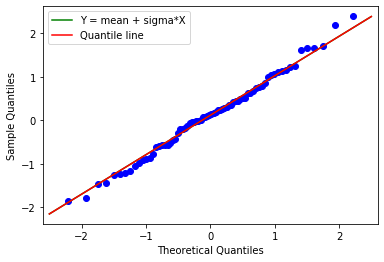

In [248]:
sm.qqplot(X3)
plt.plot(qqX3,Y3,color='g',label='Y = mean + sigma*X')
plt.plot(qqX3,Ynew3,color='r',label = 'Quantile line')
plt.legend()
plt.savefig('Quantiles_normalized_maghet.png')
plt.show()

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

In [142]:
from scipy.optimize import curve_fit

In [143]:
def linfit(x,m,c):
    return m*x + c

In [127]:
cephdat = pd.read_csv(pathfile+"Cepheids.csv")

In [128]:
cephdat.head()

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI
0,OGLE-LMC-CEP-0002,4.529733,-69.81933,F,LMC,14.52500,0.493893,0.740
1,OGLE-LMC-CEP-0005,4.592089,-69.73497,F,LMC,13.49540,0.749122,0.752
2,OGLE-LMC-CEP-0012,4.630203,-67.21442,F,LMC,14.54210,0.424912,0.598
3,OGLE-LMC-CEP-0016,4.642367,-67.64631,F,LMC,12.03300,1.021456,1.080
4,OGLE-LMC-CEP-0017,4.649119,-69.68839,F,LMC,14.34215,0.565524,0.647


In [136]:
lmc = cephdat[cephdat["Cloud"]=="LMC"]
smc = cephdat[cephdat["Cloud"]=="SMC"]
lmcf1 = lmc[lmc["Mode"]=="F"]
lmc1 = lmc[lmc["Mode"]=="1"]
smcf1 = smc[smc["Mode"]=="F"]
smc1 = smc[smc["Mode"]=="1"]

In [156]:
poptf1, pcov = curve_fit(linfit,lmcf1["logP1"],lmcf1["W"])
popt1, pcov = curve_fit(linfit,lmc1["logP1"],lmc1["W"])

In [200]:
#calculate residuals
ylmcf1 = poptf1[0]*lmcf1["logP1"] + poptf1[1]
ylmc1 = popt1[0]*lmc1["logP1"] + popt1[1]
reslmcf1 = lmcf1["W"] - ylmcf1 
reslmc1 = lmc1["W"] - ylmc1 
mean_reslmcf1 = np.mean(reslmcf1)
mean_reslmc1 = np.mean(reslmc1)
std_reslmcf1 = np.std(reslmcf1)
std_reslmc1 = np.std(reslmc1)

In [201]:
xvallmcf1 = np.linspace(np.min(reslmcf1),np.max(reslmcf1),len(reslmcf1))
estpdflmcf1  = st.norm.pdf(xvallmcf1, loc=mean_reslmcf1, scale=std_reslmcf1)

xvallmc1 = np.linspace(np.min(reslmc1),np.max(reslmc1),len(reslmc1))
estpdflmc1  = st.norm.pdf(xvallmc1, loc=mean_reslmc1, scale=std_reslmc1)

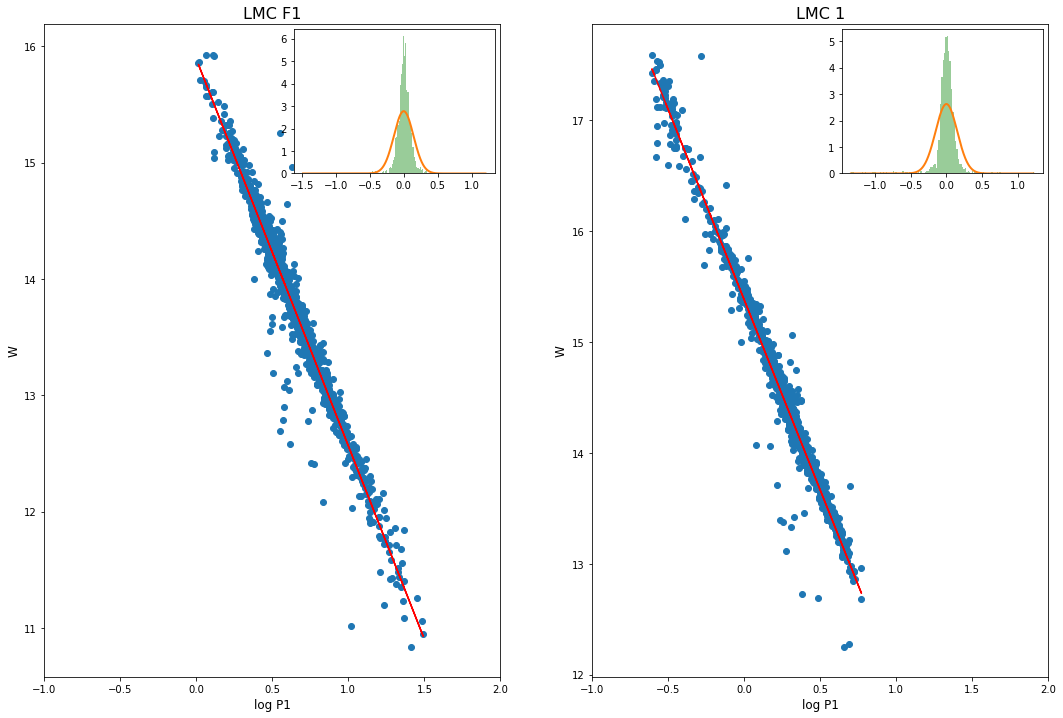

In [209]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18, 12))
ax1.scatter(lmcf1["logP1"],lmcf1["W"])
ax1.plot(lmcf1["logP1"],ylmcf1,color='r')
ax1.set_title("LMC F1",fontsize=16)
ax1.set_xlabel("log P1",fontsize=12)
ax1.set_ylabel("W",fontsize=12)
ax1.set_xlim(-1,2)
axins1 = inset_axes(ax1, width=2.8, height=2.0)
ahist(reslmcf1, bins='freedman', density=True,ax=axins1,color='g',alpha=0.4)
axins1.plot(xvallmcf1, estpdflmcf1, color='C1', lw=2)

ax2.scatter(lmc1["logP1"],lmc1["W"])
ax2.plot(lmc1["logP1"],ylmc1,color='r')
ax2.set_title("LMC 1",fontsize=16)
ax2.set_xlabel("log P1",fontsize=12)
ax2.set_ylabel("W",fontsize=12)
ax2.set_xlim(-1,2)
axins2 = inset_axes(ax2, width=2.8, height=2.0)
ahist(reslmc1, bins='freedman', density=True,ax=axins2,color='g',alpha=0.4)
axins2.plot(xvallmc1, estpdflmc1, color='C1', lw=2)
plt.savefig('LMC.png')
plt.show()

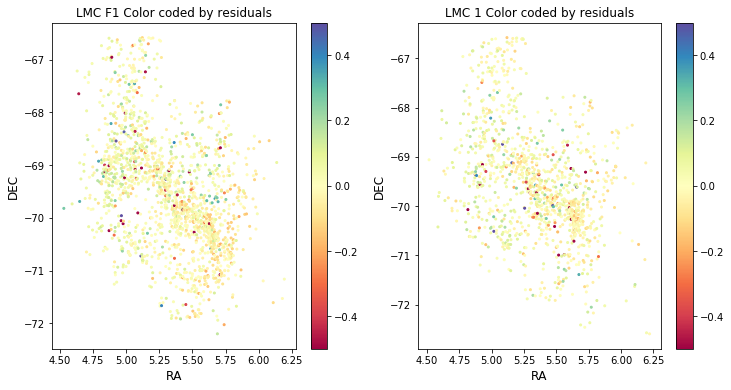

In [217]:
f, (ax1, ax2) =  plt.subplots(1,2,figsize=(12, 6))
points1 = ax1.scatter(lmcf1["RA0"],lmcf1["Decl0"],c=reslmcf1,s=4,cmap="Spectral",
                    vmin=-0.5, vmax=0.5)
plt.colorbar(points1,ax=ax1)
ax1.set_xlabel("RA",fontsize=12)
ax1.set_ylabel("DEC",fontsize=12)
ax1.set_title("LMC F1 Color coded by residuals")

points2 = ax2.scatter(lmc1["RA0"],lmc1["Decl0"],c=reslmc1,s=4,cmap="Spectral",
                    vmin=-0.5, vmax=0.5)
plt.colorbar(points2,ax=ax2)
ax2.set_xlabel("RA",fontsize=12)
ax2.set_ylabel("DEC",fontsize=12)
ax2.set_title("LMC 1 Color coded by residuals")
plt.savefig('LMC_RADEC.png')

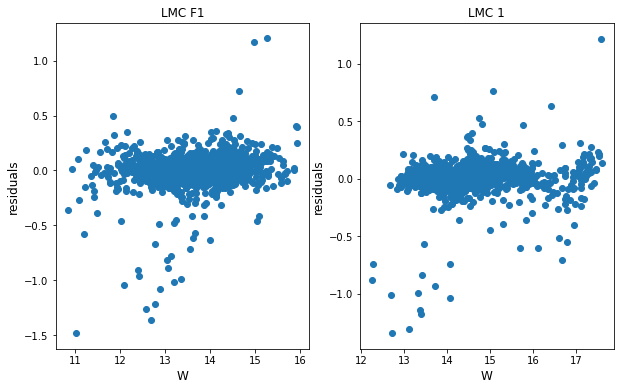

In [227]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 6))
ax1.scatter(lmcf1["W"],reslmcf1)
ax1.set_xlabel("W",fontsize=12)
ax1.set_ylabel("residuals",fontsize=12)
ax1.set_title("LMC F1")
ax2.scatter(lmc1["W"],reslmc1)
ax2.set_xlabel("W",fontsize=12)
ax2.set_ylabel("residuals",fontsize=12)
ax2.set_title("LMC 1")
plt.savefig('LMC_W_residuals.png')
plt.show()

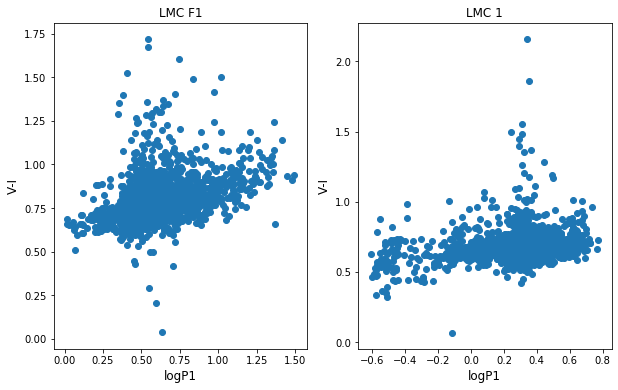

In [226]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 6))
ax1.scatter(lmcf1["logP1"],lmcf1["VI"])
ax1.set_xlabel("logP1",fontsize=12)
ax1.set_ylabel("V-I",fontsize=12)
ax1.set_title("LMC F1")
ax2.scatter(lmc1["logP1"],lmc1["VI"])
ax2.set_xlabel("logP1",fontsize=12)
ax2.set_ylabel("V-I",fontsize=12)
ax2.set_title("LMC 1")
plt.savefig('LMC_logP_VI.png')
plt.show()

In [210]:
poptsmcf1, psmccovf1 = curve_fit(linfit,smcf1["logP1"],smcf1["W"])
poptsmc1, psmccov1 = curve_fit(linfit,smc1["logP1"],smc1["W"])

#calculate residuals
ysmcf1 = poptsmcf1[0]*smcf1["logP1"] + poptsmcf1[1]
ysmc1 = poptsmc1[0]*smc1["logP1"] + poptsmc1[1]
ressmcf1 = smcf1["W"] - ysmcf1 
ressmc1 = smc1["W"] - ysmc1 
mean_ressmcf1 = np.mean(ressmcf1)
mean_ressmc1 = np.mean(ressmc1)
std_ressmcf1 = np.std(ressmcf1)
std_ressmc1 = np.std(ressmc1)

xvalsmcf1 = np.linspace(np.min(ressmcf1),np.max(ressmcf1),len(ressmcf1))
estpdfsmcf1  = st.norm.pdf(xvalsmcf1, loc=mean_ressmcf1, scale=std_ressmcf1)

xvalsmc1 = np.linspace(np.min(ressmc1),np.max(ressmc1),len(ressmc1))
estpdfsmc1  = st.norm.pdf(xvalsmc1, loc=mean_ressmc1, scale=std_ressmc1)

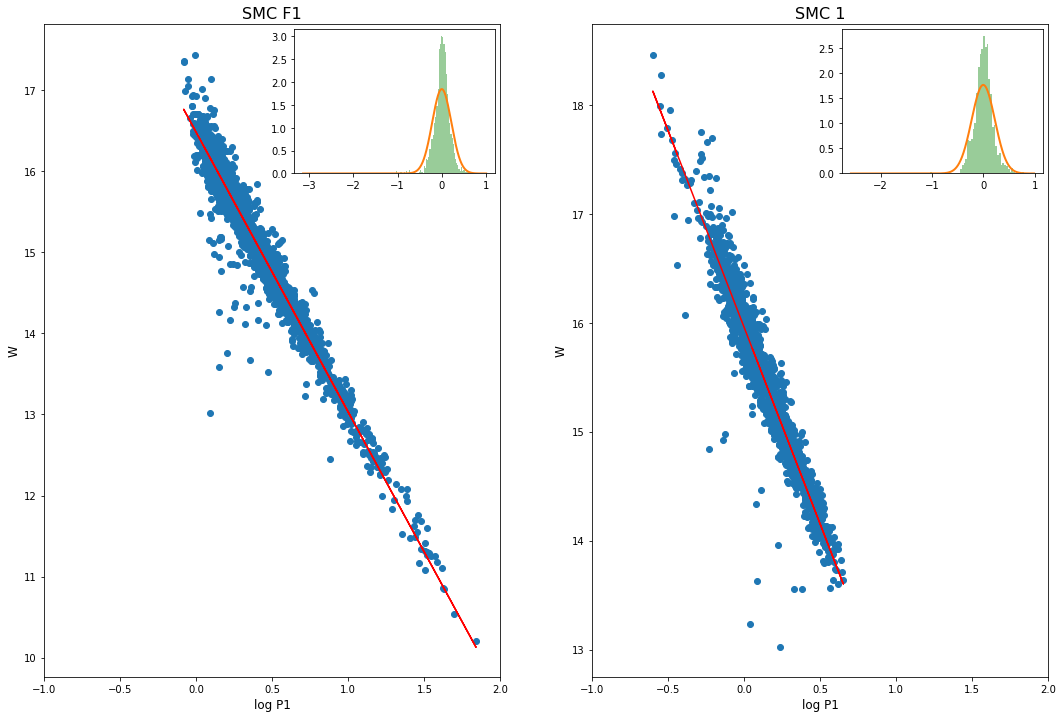

In [212]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18, 12))
ax1.scatter(smcf1["logP1"],smcf1["W"])
ax1.plot(smcf1["logP1"],ysmcf1,color='r')
ax1.set_title("SMC F1",fontsize=16)
ax1.set_xlabel("log P1",fontsize=12)
ax1.set_ylabel("W",fontsize=12)
ax1.set_xlim(-1,2)
axins1 = inset_axes(ax1, width=2.8, height=2.0)
ahist(ressmcf1, bins='freedman', density=True,ax=axins1,color='g',alpha=0.4)
axins1.plot(xvalsmcf1, estpdfsmcf1, color='C1', lw=2)

ax2.scatter(smc1["logP1"],smc1["W"])
ax2.plot(smc1["logP1"],ysmc1,color='r')
ax2.set_title("SMC 1",fontsize=16)
ax2.set_xlabel("log P1",fontsize=12)
ax2.set_ylabel("W",fontsize=12)
ax2.set_xlim(-1,2)
axins2 = inset_axes(ax2, width=2.8, height=2.0)
ahist(ressmc1, bins='freedman', density=True,ax=axins2,color='g',alpha=0.4)
axins2.plot(xvalsmc1, estpdfsmc1, color='C1', lw=2)
plt.savefig('SMC.png')
plt.show()

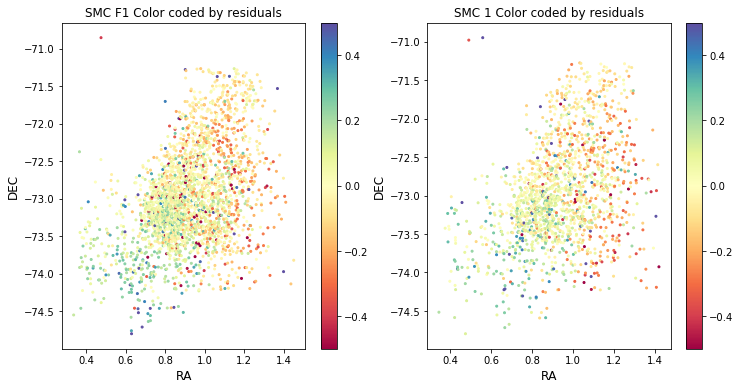

In [218]:
f, (ax1, ax2) =  plt.subplots(1,2,figsize=(12, 6))
points1 = ax1.scatter(smcf1["RA0"],smcf1["Decl0"],c=ressmcf1,s=4,cmap="Spectral",
                    vmin=-0.5, vmax=0.5)
plt.colorbar(points1,ax=ax1)
ax1.set_xlabel("RA",fontsize=12)
ax1.set_ylabel("DEC",fontsize=12)
ax1.set_title("SMC F1 Color coded by residuals")

points2 = ax2.scatter(smc1["RA0"],smc1["Decl0"],c=ressmc1,s=4,cmap="Spectral",
                    vmin=-0.5, vmax=0.5)
plt.colorbar(points2,ax=ax2)
ax2.set_xlabel("RA",fontsize=12)
ax2.set_ylabel("DEC",fontsize=12)
ax2.set_title("SMC 1 Color coded by residuals")
plt.savefig('SMC_RADEC.png')

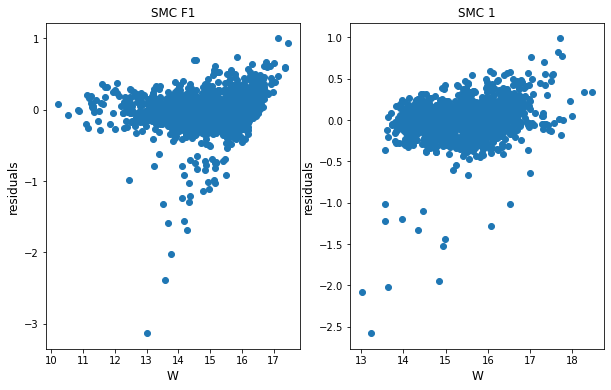

In [228]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 6))
ax1.scatter(smcf1["W"],ressmcf1)
ax1.set_xlabel("W",fontsize=12)
ax1.set_ylabel("residuals",fontsize=12)
ax1.set_title("SMC F1")
ax2.scatter(smc1["W"],ressmc1)
ax2.set_xlabel("W",fontsize=12)
ax2.set_ylabel("residuals",fontsize=12)
ax2.set_title("SMC 1")
plt.savefig('SMC_W_residuals.png')
plt.show()

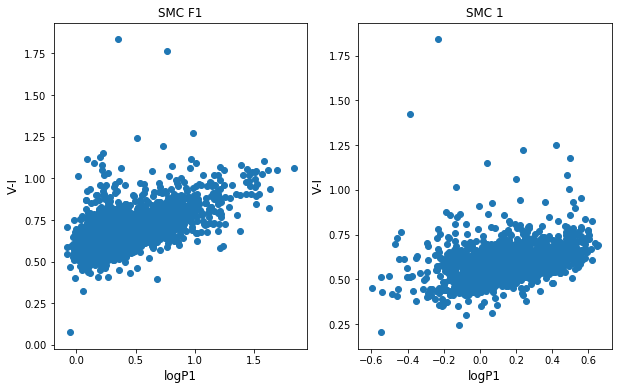

In [229]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 6))
ax1.scatter(smcf1["logP1"],smcf1["VI"])
ax1.set_xlabel("logP1",fontsize=12)
ax1.set_ylabel("V-I",fontsize=12)
ax1.set_title("SMC F1")
ax2.scatter(smc1["logP1"],smc1["VI"])
ax2.set_xlabel("logP1",fontsize=12)
ax2.set_ylabel("V-I",fontsize=12)
ax2.set_title("SMC 1")
plt.savefig('SMC_logP_VI.png')
plt.show()